Answer 2 
 malignant    212
benign       357
Name: target, dtype: int64 

Answer 5 
 KNeighborsClassifier(n_neighbors=1) 

Answer 6 
 [1.] 

Answer 7 
 143 
 [1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1.
 0. 1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 0. 1. 0. 1. 0. 0. 1. 1.
 1. 0. 0. 1. 0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 1. 1. 0.
 1. 1. 0. 1. 1. 1. 1. 1. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 1. 0. 1. 0. 1. 1.
 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 1. 0. 0. 1. 1. 1. 0. 1. 1. 1.
 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 0.] 

Answer 8 
 0.916083916083916 

Answer 1 
 rows 
 569 31 Columns 
      mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         2

C:\ANA\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\ANA\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


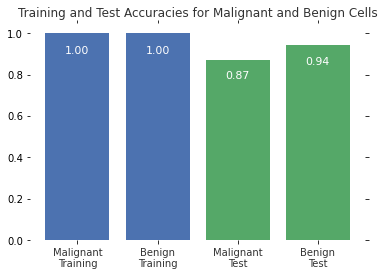

In [77]:
##############################DATA IMPORTED #################
import numpy
import pandas
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
cancer = load_breast_cancer()
cancer.keys()
#print(cancer.DESCR)
#dict_keys(['DESCR', 'target', 'feature_names', 'data', 'target_names'])
#############################################################
def answer_one():           
    data = numpy.c_[cancer.data, cancer.target]
    columns = numpy.append(cancer.feature_names, ["target"])
    return pandas.DataFrame(data, columns=columns)
frame = answer_one()
assert frame.shape == (len(cancer.target), 31)
#############################################################
def answer_two():
    cancerdf = answer_one()
    counts = cancerdf.target.value_counts(ascending=True)
    counts.index = "malignant benign".split()
    return counts
output = answer_two()
assert output.malignant == 212
assert output.benign == 357
#############################################################
def answer_three():
    cancerdf = answer_one()
    X = cancerdf[cancerdf.columns[:-1]]
    y = cancerdf.target
    return X, y
x, y = answer_three()
assert x.shape == (569, 30)
assert y.shape == (569,)
#############################################################
def answer_four():
    X, y = answer_three()
    return train_test_split(X, y, train_size=426, test_size=143, random_state=0)
#############################################################
def answer_five():
    X_train, X_test, y_train, y_test = answer_four()
    model = KNeighborsClassifier(n_neighbors=1)
    model.fit(X_train, y_train)
    return model
knn = answer_five()
assert type(knn) == KNeighborsClassifier
assert knn.n_neighbors == 1
#############################################################
def answer_six():
    cancerdf = answer_one()
    means = cancerdf.mean()[:-1].values.reshape(1, -1)
    model = answer_five()
    return model.predict(means)
answer_six()
#############################################################
def answer_seven():
    X_train, X_test, y_train, y_test = answer_four()
    knn = answer_five()
    return knn.predict(X_test)
predictions = answer_seven()
assert predictions.shape == (143,)
assert set(predictions) == {0.0, 1.0}
#############################################################
def answer_eight():
    X_train, X_test, y_train, y_test = answer_four()
    knn = answer_five()
    return knn.score(X_test, y_test)
answer_eight()
##Printing ANSWERS##
##############################################################
print("Answer 2 \n",answer_two(),"\n")
print("Answer 5 \n",answer_five(),"\n")
print("Answer 6 \n",answer_six(),"\n")
x_ =len(predictions[predictions==0])+len(predictions[predictions==1])
print("Answer 7 \n",x_,"\n",answer_seven(),"\n")
print("Answer 8 \n",answer_eight(),"\n")
print("Answer 1 \n rows \n",len(cancer.target), 31,"Columns \n",answer_one(),"\n\n\n\n\n\n\n")
print("Answer 3 \n >>>X",x.shape)
print(">>>Y ",y.shape)
print("Data AND Labels \n\n",answer_three(),"\n\n\n\n\n\n\n")
print("Answer 4 \n",answer_four(),"\n\n\n\n\n")




#################++++++++++++++++++++################TESTING#  >>>>>>>>OPTIONALLY 
%matplotlib inline
def accuracy_plot():
    import matplotlib.pyplot as plt

    X_train, X_test, y_train, y_test = answer_four()

    # Find the training and testing accuracies by target value (i.e. malignant, benign)
    mal_train_X = X_train[y_train==0]
    mal_train_y = y_train[y_train==0]
    ben_train_X = X_train[y_train==1]
    ben_train_y = y_train[y_train==1]

    mal_test_X = X_test[y_test==0]
    mal_test_y = y_test[y_test==0]
    ben_test_X = X_test[y_test==1]
    ben_test_y = y_test[y_test==1]

    knn = answer_five()

    scores = [knn.score(mal_train_X, mal_train_y), knn.score(ben_train_X, ben_train_y),
              knn.score(mal_test_X, mal_test_y), knn.score(ben_test_X, ben_test_y)]


    plt.figure()

    # Plot the scores as a bar chart
    bars = plt.bar(numpy.arange(4), scores, color=['#4c72b0','#4c72b0','#55a868','#55a868'])

    # directly label the score onto the bars
    for bar in bars:
        height = bar.get_height()
        plt.gca().text(bar.get_x() + bar.get_width()/2, height*.90, '{0:.{1}f}'.format(height, 2),
                     ha='center', color='w', fontsize=11)

    # remove all the ticks (both axes), and tick labels on the Y axis
    plt.tick_params(top='off', bottom='off', left='off', right='off', labelleft='off', labelbottom='on')

    # remove the frame of the chart
    for spine in plt.gca().spines.values():
        spine.set_visible(False)

    plt.xticks([0,1,2,3], ['Malignant\nTraining', 'Benign\nTraining', 'Malignant\nTest', 'Benign\nTest'], alpha=0.8);
    plt.title('Training and Test Accuracies for Malignant and Benign Cells', alpha=0.8)
accuracy_plot()
#####################################################################################################################################

### 